CRED
Dream11 - App
how does dream11 makes money
data science at dream11
data science at airbnb

In [ ]:
100+ raw features
30-40 derived features (Aggregates)
10 KPI - Final Features
Model
Feature Selection (Mathematical)

In [ ]:
curse of dimensionality
longer is the time and complexity for CONVERGENCE (best parameters)
best coefficinets

log(p/(1-p)) = logit(p) = b0 + b1x1 + b2x2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<h1 align="center">Feature Selection</h1>

![feature_selection](../images/feature_selection.png)

## Program so far

***

- Basics of Python
- Descriptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering

# Table of contents
***

- Importance of Feature Selection
    - Variance Threshold
    - Pearson
    - Select K Best
    - f_regression
    - RFE

**What is to be covered later?**


- Filter Methods
- Wrapper Methods
- Embedded Methods
- Difference between Filter and Wrapper methods
- Walk-through example

*****

## So what is Feature Selection?
***
* In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

In [ ]:
large rows = big data 1000

SAMPLING
- SRS
- Stratify

100

## Importance of Feature Selection
***
* This becomes even more important when the number of features are very large.
* You need not use every feature at your disposal for creating an algorithm. 
* You can assist your algorithm by feeding in only those features that are really important.

Linear Algo
y = BtX
X = 1000 vs 100 vs 10
LR - Coeff have some meaning, defined relationships between DV and IV

Clustering - Market segmentation
clusters

## Where to use feature selection?
***
- It enables the machine learning algorithm to train faster.
- It reduces the complexity of a model and makes it easier to interpret.
- It improves the accuracy of a model if the right subset is chosen.
- It reduces overfitting.

# Type of Feature Selection
***
Jay helped John identify different types of feature selection:-

* Univariate Feature Selection
* Multivariate Feature Selection


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br >

## Univariate Feature Selection (1/2)
***
* Univariate feature selection methods examine -
    - the predictive power of individual features
    - the strength of the relationship of the feature with the response variable
* These methods are simple to run and understand
* They also prove to be good for gaining a better understanding of data, and can often be the starting point for multivariate feature selection methods

corr 
what kind of relationship --> linear


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br >

## Univariate Feature Selection (2/2)
***
* We can look at the interaction between the top variables instead of all possible combinations
* These methods are not necessarily good for optimizing the feature set for better generalization

continuous variables

X1 = [1,1,1,1,1,1,1,1,1,1] = 0
X2 = [1,2,3,4,5,6,2,3,4,5] = 2
Variance = Knowledge = Information = Data = Pattern

select features whose var > threshold = 1.5

### Method 1 : Removing features with low variance (1/2)
***
* One of the most basic, yet a very powerful feature selection technique
* We want to remove all features whose variance doesn't meet some threshold
* For example, a feature with 0 variance means it has the same value for every sample. This means that such a feature would not bring any predictive power to the model. 
* Hence, we should remove all such zero-variance features


### Removing features with low variance (2/2)
***
* John thought, if he had a dataset with boolean features, and he wanted to remove all features that were either one or zero (on or off) in more than 80% of the samples. How would he do that?

* Answer : Boolean features are Bernoulli random variables, and the variance of such variables is given by  Var(x)=p(1−p)

* *from sklearn.feature_selection import VarianceThreshold*   is a handy method to remove such features


In [ ]:
X = [0, 0, 0, 0, 1]

In [54]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [55]:
.8 * (1 - .8)
np.array(X)[:, 0].var()
np.array(X)[:, 1].var()
np.array(X)[:, 2].var()

0.15999999999999998

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]


0.13888888888888892

0.22222222222222224

0.25

In [56]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
X
sel = VarianceThreshold(threshold=0.1)
sel.fit_transform(X)

[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [ ]:
Continuos - Variance
Categorical - Entropy ~ Variance 
Entropy ---> 1, select the column
0 to 1


### Method 2 : Pearson Correlation
***
* Another method that Jay suggested was Pearson Correlation
* The population correlation coefficient  $ρ_{(X,Y)}$  between two random variables  X and  Y with expected values  $μ_X$  and  $μ_Y$  and standard deviations  $σ_X$ and  $σ_Y$.
* It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:
![FS3.JPG](../images/FS3.JPG)
* where E is the expected value operator, cov means covariance, and corr is a widely used alternative notation for the correlation coefficient.

DV
10 IV
(DV, IV) - Correlation
abs(Correlation) > 0.3

### Pearson Correlation
***
* One of the simplest method for understanding a feature's relation to the response variable is Pearson correlation coefficient, which measures linear correlation between two variables
* Scipy's Pearson's method computes both the correlation and p-value for the correlation, roughly showing the probability of an uncorrelated system creating a correlation value of this magnitude.

In [15]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

iowa = pd.read_csv('../data/house_prices_multivariate.csv')
iowa.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000


In [57]:
iowa.corr()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.096486,0.181773,-0.055003,0.036465,0.078981,0.105703,0.081660,-0.011105,0.155099,0.239537,0.243530,0.039884,0.023274,0.217118,0.016265,-0.025648,0.112496,-0.016263,0.143522,0.032789,0.218991,0.044074,0.044045,0.193139,0.231974,-0.021568,0.073032,0.026765,0.023441,0.022293,0.115886,-0.064162,-0.014347,0.213331
LotArea,0.096486,1.000000,0.090016,-0.002869,-0.005921,0.002764,0.095510,0.210145,0.110011,-0.009707,0.252932,0.291478,0.046253,0.010177,0.257243,0.161040,0.046480,0.117064,0.005700,0.119746,-0.012477,0.185724,0.265083,-0.024947,0.137978,0.167622,0.166600,0.085056,-0.013427,0.018443,0.038605,0.076868,0.040288,-0.013797,0.252921
OverallQual,0.181773,0.090016,1.000000,-0.136232,0.572082,0.557772,0.398334,0.223690,-0.073166,0.318552,0.531977,0.467425,0.286109,-0.014550,0.589584,0.108955,-0.056924,0.556231,0.264944,0.081714,-0.173051,0.426834,0.380163,0.547766,0.581381,0.528107,0.227272,0.319045,-0.106609,0.024314,0.050580,0.064305,-0.029078,-0.019273,0.787228
OverallCond,-0.055003,-0.002869,-0.136232,1.000000,-0.403602,0.048340,-0.132515,-0.050818,0.038770,-0.140730,-0.182020,-0.147171,0.016720,0.043216,-0.092217,-0.061775,0.121662,-0.218474,-0.062217,0.014985,-0.101463,-0.068573,-0.026489,-0.324297,-0.247317,-0.196678,-0.005638,-0.053090,0.063196,0.026735,0.057507,-0.002274,0.079088,0.050309,-0.095278
YearBuilt,0.036465,-0.005921,0.572082,-0.403602,1.000000,0.618058,0.298459,0.229643,-0.066657,0.157525,0.376977,0.258161,0.017152,-0.159333,0.194663,0.181559,-0.054074,0.482739,0.235722,-0.071794,-0.164898,0.101539,0.113546,0.825667,0.523349,0.444951,0.213102,0.220775,-0.378630,0.026285,-0.069431,0.001167,-0.033892,-0.006809,0.507584
YearRemodAdd,0.078981,0.002764,0.557772,0.048340,0.618058,1.000000,0.171066,0.114668,-0.077820,0.188918,0.283572,0.235044,0.128197,-0.063419,0.278864,0.112381,-0.020593,0.444677,0.182239,-0.067375,-0.173640,0.173375,0.100770,0.642277,0.450659,0.382323,0.204308,0.235763,-0.210831,0.043737,-0.048102,0.004089,-0.003292,0.039937,0.505434
MasVnrArea,0.105703,0.095510,0.398334,-0.132515,0.298459,0.171066,1.000000,0.253765,-0.077065,0.113269,0.353471,0.332127,0.173013,-0.060661,0.389398,0.082783,0.018344,0.268730,0.193239,0.108731,-0.019801,0.285401,0.234058,0.248546,0.361334,0.366771,0.151293,0.126715,-0.104787,0.015923,0.055041,0.010030,-0.029238,-0.004871,0.463139
BsmtFinSF1,0.081660,0.210145,0.223690,-0.050818,0.229643,0.114668,0.253765,1.000000,-0.054966,-0.502954,0.521366,0.446596,-0.142969,-0.050021,0.208016,0.647400,0.060852,0.044227,-0.007579,-0.118036,-0.065825,0.044389,0.253887,0.153484,0.201996,0.289128,0.194729,0.120338,-0.096743,0.023903,0.056216,0.141615,0.006846,0.017754,0.375563
BsmtFinSF2,-0.011105,0.110011,-0.073166,0.038770,-0.066657,-0.077820,-0.077065,-0.054966,1.000000,-0.214549,0.100526,0.094006,-0.106641,0.007453,-0.019636,0.159399,0.074146,-0.089523,-0.035581,-0.007734,-0.037808,-0.041156,0.039251,-0.088011,-0.075257,-0.047320,0.063257,0.004866,0.045387,-0.031442,0.087332,0.041470,0.006052,0.032719,-0.023243
BsmtUnfSF,0.155099,-0.009707,0.318552,-0.140730,0.157525,0.188918,0.113269,-0.502954,-0.214549,1.000000,0.406118,0.311394,-0.006450,-0.000859,0.226614,-0.425382,-0.096290,0.294838,-0.052574,0.148676,0.018942,0.233023,0.047401,0.190708,0.244263,0.201121,-0.005322,0.131830,0.001498,0.020335,-0.015133,-0.036528,-0.019059,-0.044258,0.213135


In [16]:
X = iowa.iloc[:,:-1]
y = iowa.iloc[:,-1]

for i in X.columns:
    print(pearsonr(X[i],y))

(0.21333063767622737, 1.173758672280763e-15)
(0.25292145909045377, 1.439318030209563e-21)
(0.7872278260873349, 2.1445443005891603e-291)
(-0.09527774132244107, 0.00039562906150172357)
(0.5075840635608161, 3.495209087977969e-91)
(0.505434060859455, 2.6380742157963195e-90)
(0.4631391235888981, 2.9820001700094e-74)
(0.37556275564606295, 1.966135916972045e-47)
(-0.02324290591485014, 0.3884363404850394)
(0.21313492312249652, 1.2477039987506597e-15)
(0.6035834052193846, 1.2138812661329916e-137)
(0.5949352701531119, 8.443442692469426e-133)
(0.3133355898234007, 8.586805601807326e-33)
(-0.008364395196306247, 0.7563064872701748)
(0.7081721139540178, 2.088156146344369e-210)
(0.22598801206023672, 1.986961703719974e-17)
(-0.02565087567084923, 0.3411805469575488)
(0.5565503021306585, 5.531853884331464e-113)
(0.2707212077054506, 1.3703337439166788e-24)
(0.16465494921067644, 7.70321339882936e-10)
(-0.13557396150699427, 4.3422728354813724e-07)
(0.5383091241374476, 1.93191535858718e-104)
(0.4488774828416

In [ ]:
multicollinearity

In [ ]:
0 - 0.2 - very weak
0.2 - 0.4 - weak 
0.4 - 0.6 - moderate
0.6 - 0.8 - strong
> 0.8 - very strong

### Pearson Correlation
***
* With smaller amount of noise, the correlation is relatively strong, with a very low p-value
* However, for the noisy comparison, the correlation is very small and p-value is very high
* The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets

### Pearson Correlation: 
***
* Pearson correlation is the ratio of co-variance of two variables to a product of variance (of the variables)
* The correlation coefficient has values between -1 to 1
    - A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    - A value closer to 1 implies stronger positive correlation
    - A value closer to -1 implies stronger negative correlation


### Pearson Correlation
***
**Correlation is not Transitive:**

* Let  X,  Y and  Z be random variables.
    - ρ(X,Y) > 0.8
    - ρ(Y,Z) > 0.7

* Can we say  ρ(X,Z)  will be strongly positive?


In [ ]:
A:B
    B:C
        A:C ??

### Pearson Correlation
***
**Correlation is not Transitive:**

* Not really! 
* ρX,Z will be positive if ρX,Y and ρY,Z are very close to 1
* Mathematically speaking:
![FS4.JPG](../images/FS4.JPG)

### Pearson Correlation
***
**Sensitivity to Outliers:**
Once again:
![FS5.JPG](../images/FS5.JPG)
* Means themselves are sensitive to outliers
* The correlation itself will be sensitive to outliers as well

### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**
 
* One obvious drawback of Pearson correlation as a feature ranking mechanism is that it is only sensitive to a linear relationship.
* If the relation is non-linear, Pearson correlation can be close to zero even if there is a 1-1 correspondence between the two variables.
* For example, correlation between x and $x_2$ is zero, when x is centered on 0.

### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**
 
* In the image in the next slide, there are several sets of (x, y) points, with the Pearson correlation coefficient of x and y for each set.
* Note that the correlation reflects the noisiness and direction of a linear relationship (top row), but not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom).


### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**

![FS6.JPG](../images/FS6.JPG)

### Pearson Correlation
*** 
![FS7.JPG](../images/FS7.JPG)

Anscombe's dataset

Filtering Methods (Univariate)
1. Variance
2. Correlation (Entropy)

#### Now that John understood Pearson's Correlation, he wanted to get deeper into Feature Extraction in Python.

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br>

## Sklearn for Feature Selection
***
* Scikit-learn has a wide variety of functions for eliminating features based information-criteria (score)
* For performing univariate feature selection, we need to specify two parameters
    - Selection criteria
    - Metric to be used for selection



**Sklearn for Feature Selection**
##### Selection Criteria
* SelectKBest: Removes all but the k highest scoring features
* SelectPercentile: Removes all but a user-specified highest scoring percentage of features


**Sklearn for Feature Selection**
##### Regression
* **f_regression**: The methods based on F-test estimate the degree of linear dependency between two random variables.
* **Mutual_info_regression**:Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation


F-Score (linear relationship)
- F test (Ratio of two variances, one with your feature under consideration, without the feature)

X: Take all your features
y: Target
    
(X,y) - Fscore
Select the best features based on some threshold

Mutual_info
How much information do I get to know, if I knw the presence of the other feature
nonparametric - it has no parameters (they have large parameters = points in dataset)
100 rows (10 columns) 
1000 rows

1. KNN
2. Decision tree

In [ ]:
100 rows - 100 (distance metric)
1000 rows - 1000
10k rows - 10k


Linear Rgression
5 coeff
100 rows
1000 rows

**Sklearn for Feature Selection**

##### Selection Metric
##### Classification

* **chi2**: Based on Chi Squared
* **F_classif**: Based on f-test
* **Mutual_info_classif**: Based on Mutual Information Theory

Let's understand how f-test and mutual information behave differently. Let's start by creating a toy dataset, in which y depends on three components: a linear, a non-linear and a random.

$y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1)$

In [59]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(67)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(5* np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [60]:
X.shape
X[:5]
y[:5]

(1000, 3)

array([[0.54585143, 0.85885661, 0.68589259],
       [0.33159182, 0.05999793, 0.38627778],
       [0.21314986, 0.93250665, 0.7228183 ],
       [0.04689531, 0.82131085, 0.5918695 ],
       [0.25207151, 0.31507669, 0.18783802]])

array([ 1.43631861,  1.21126756,  1.02413803,  0.31387752, -0.72478814])

Now, let's calculate the importance scores of the features and normalize them so that they can be compared with each other.

In [62]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, f_test_pval = f_regression(X, y)
f_test
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi
mi /= np.max(mi)

array([1.35990658e+02, 1.20467834e-01, 1.55424071e-02])

array([0.2237999 , 0.83283636, 0.        ])

In [24]:
f_test

array([1.00000000e+00, 8.85853745e-04, 1.14290255e-04])

In [25]:
mi

array([0.26872014, 1.        , 0.        ])

Now, let's plot these values and compare them.

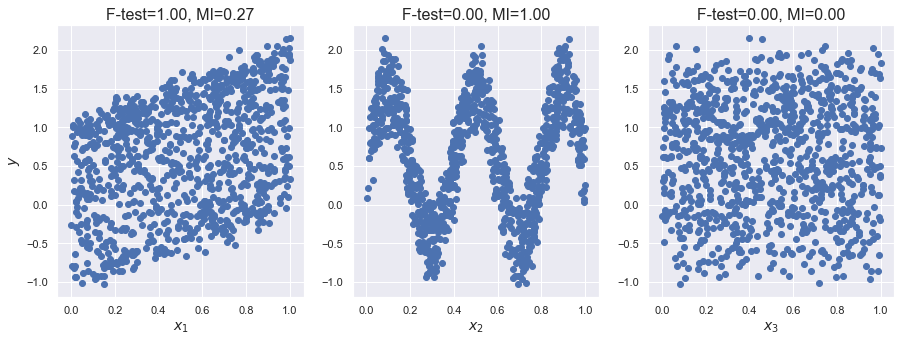

In [29]:
a = plt.figure(figsize=(15, 5))
for i in range(3):
    a = plt.subplot(1, 3, i + 1);
    a = plt.scatter(X[:, i], y);
    a = plt.xlabel("$x_{}$".format(i + 1), fontsize=14);
    if i == 0:
        a = plt.ylabel("$y$", fontsize=14);
    a = plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16);

We can clearly see how f-test can only capture the linear relationship, whereas MI can capture no-linear relationships as well. You can vary the coefficient of the `sin` component to examine how the MI behaves when the coefficient is made sufficiently low.

### Various methodologies and techniques  to subset  feature space and make models perform better and efficiently.
***
John got a good measure of feature selection and was more confident than ever on it. He started reading more on techniques to make his models more efficient. This is what he found out-

In [ ]:
KPi = f(x1, x2, x3)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>

<br>

##  Filter Methods
***
![Filter_1.png](../images/Filter_1.png)
[Source: Analytics Vidya Blog](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/) 

* Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. 
* Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here.
* Examples that we saw just now, are some of the filter mathod techniques.
* For basic guidance, you can refer to the following table for defining correlation co-efficients.

Filter Methods - Independent scores
Wrapper Methods - Based on the scores, select subset and run in iteration
Embedded Methods - Feature is part of algorithm itself

Variance
Correlation (entropy)
f_regression
mutual_info

##  Filter Methods

![FS1.png](../images/FS1.png)
[Source: An Analysis of Feature Selection Techniques](http://syllabus.cs.manchester.ac.uk/pgt/2017/COMP61011/goodProjects/Shardlow.pdf)

DV - Continuous, IV - Continuous: Correlation (MI)
DV - Continuous, IV - Categorical: ANOVA (f_classi)
loan_approval, salary
yes, 100
yes, 150
yes, 120

no, 60
no, 70
no, 80

Grp1 (loan_approval = true) - 130
Grp2 (loan_approval = False) - 70
IV = loan_approval ---> Non-Redundant

Grp1 (Gender = Male) - 100
Grp2 (Gender = Female) - 100
IV = Gender ---> Redundant

ANOVA - Analysis of variance
N categories 

Color of house : {red green blue}
Price of house


DV - Continuous, IV - Categorical: ANOVA (f_classi)

In [ ]:
F distribution

In [ ]:
Linear Discriminant Analysis - Feature reduction technique for supervised methods
N features
Transformed space, 

Classification
1. LDA (New Subspace == New Axis) ---> assumption from dataset
2. Classifciation algo


In [ ]:
Output - Categorical
Input - Continuous
Logistic reregssion

log(p/1-p) = BtX
pvalues, coeff

XGBoost
1. Feature

In [ ]:
A,B,C

New_Comp1 = xA + yB + zC
New_Comp2 = aA + bB + cC
New_Comp3 = dA + eB + fC

LDA ---> separate classes (sup technique)
PCA ---> get max variance (unsup technique)

100 features ----> 100 % variation
100 Principal Components
10 PC ----> 90%
90 PC ---> 10%

1000 features ----> 30-50 features ---> 95% of variation

1. Quicker Convergence

use the result of PCA and LDA
100 --> new 100
each feature is ging to be a linear combination of all 100 
variance explained
instead of 100, usage of top 10, 20 lDA components is able to explain 90-95% of variation
and hence we can choose only the top X components

Original = 3 = X1, X2, X3

newLDA1 = aX1 + bX2 + cX3
newLDA2 = xX1 + yX2 + zX3
newLDA3

salesprice = neighbourhood + garagearea + bathroom + living
newLDA1 = 0.1*garagearea + 0.9*bathroom + -1.2*living area
newLDA2
new..LDA4

a,b,c,x,y,z = Numbers

neighbourhood, garagearea, salesprice

LDA = target categorical
PCA = don't have target, target is continuous

Objective: Transform from one co-ordinate to another co-ordinate

newLDA1, newLDA2, salesprice
newPC1, newPC2, salesprice

newLDA1 = a*neighbourhood + b*garagearea
newLDA2 = x*neighbourhood + y*garagearea

newPC1, salesprice ----> reduced my feature space

Linear regre
Decision tree

In [ ]:
Input categorical
Output categorical
chi-square

##  Filter Methods 
***
**Pearson’s Correlation**: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson's correlation is given as:
![FS2.png](../images/FS2.png)
[Source: An Analysis of Feature Selection Techniques](http://syllabus.cs.manchester.ac.uk/pgt/2017/COMP61011/goodProjects/Shardlow.pdf)

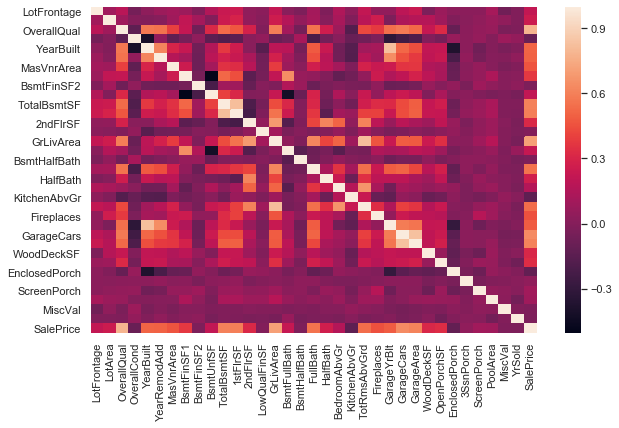

In [31]:
plt.figure(figsize=(10,6));
sns.heatmap(iowa.corr());

##  Filter Methods
***
**LDA**: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.

[Source: An Analysis of Feature Selection Techniques](http://syllabus.cs.manchester.ac.uk/pgt/2017/COMP61011/goodProjects/Shardlow.pdf)

##  Filter Methods 
***
**ANOVA**: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.



##  Filter Methods 
***
**Chi-Square**: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.



### Filter Methods vulnerability to Multicollinearity
***
One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, one must deal with multicollinearity of features as well before training models for his/her data.

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br >

## Wrapper Methods
***
![Wrapper_1.png](../images/Wrapper_1.png)

[Source: Analytics Vidya Blog](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)

In [ ]:
Iterative fashion
scores of your algorithm, internally select the top features


## Wrapper Methods
***
* In wrapper methods, we try to use a subset of features and train a model using them.
* Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset.
* The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.
* Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

## Wrapper Methods
***
**Forward Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model

In [ ]:
10 features
Regression ----> R2

1. mean(y)
2. F1 + intercept ---> R2
3. F1 + F2 + intercept ---> R3
4. F1 + F2 + F3 + intercept ---> R4 > R3 > R2 > R1
....


## Wrapper Methods
***
**Backward Elimination**: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features. This technique is also known as **Recursive Feature Elimination.**

**Recursive Feature Elimination (RFE)**

* The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain.
* It uses an external estimator that assigns weights to features (for example, the coefficients of a linear model) to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.


In [ ]:
1. begin with all features
LR: coeff
trees : feature_score
    
2. starts to remove the onces which are lowest
3. Top K features
....
left with only K features


** Recursive Feature Elimination (RFE)**

* It is a greedy optimization algorithm which aims to find the best performing feature subset.

* It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. 

* It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [64]:
iowa.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,2008,250000


In [32]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

X, y = iowa.iloc[:,:-1], iowa.iloc[:,-1]
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False False False False False False
 False False False  True  True  True False  True  True  True  True False
  True False False False False False False False False False]
[ 5 24  1  1  3 10 11 18 21 22 17  7  8 20 15  1  1  1  6  1  1  1  1  4
  1 16 13 23 19 14  9 12 25  2]


<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>

<br>

## Embedded Methods
***
![Embedded_1.png](../images/Embedded_1.png)

* Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.
* Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.
    - Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
    - Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.
* We already have learned how these algorithm works.Other examples of embedded methods are Regularized trees, Memetic algorithm, Random multinomial logit.

**Model Based Feature Selection**

* Certain models can be used as feature selection mechanisms because their inner workings involves ordering or ranking of features.
* We have already gone through such algorithms:
* Brain Teaser:
     - What are such algorithms?



**Model Based Feature Selection**
* Here are a few algorithms which help us select feature selection:
    - L1 regularized linear regression
    - Decision Trees
    - Random Forests
    - Gradient Boosting Machines


## Difference between Filter and Wrapper methods 
***
The main differences between the filter and wrapper methods for feature selection are:
* Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
* Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.

## Difference between Filter and Wrapper methods 
***
* Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
* Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

Good, Moving forward John asked one example with Iowa dataset ...

So, Jay give an example with RandomForest ( about the model we will be learning later)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.feature_selection import SelectFromModel

In [39]:
print('Before');
print(X.shape)

clf = DecisionTreeClassifier()
clf.fit(X, y)

print('\nFeature Importance');
print(clf.feature_importances_)
mean = clf.feature_importances_.mean()
print("mean: {}".format(mean))

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

print('\nAfter'); 
print(X_new.shape)
clf.feature_importances_[clf.feature_importances_ > mean].shape

Before
(1379, 34)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


Feature Importance
[0.04893149 0.05112421 0.03364729 0.02769579 0.04834965 0.04119295
 0.03284797 0.04640235 0.01092188 0.05737687 0.06130112 0.04541554
 0.02351229 0.00291654 0.05695417 0.02088361 0.00461018 0.00469419
 0.01429104 0.02245721 0.00291654 0.03139949 0.02048862 0.04703497
 0.01707633 0.06049914 0.04615425 0.04528557 0.01228436 0.00510572
 0.00972177 0.         0.00145827 0.04504864]
mean: 0.029411764705882353

After
(1379, 17)


(17,)

In [40]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=250,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [ ]:
250 estmators === decision


In [41]:
importances = forest.feature_importances_
importances

array([0.04850816, 0.05166125, 0.0345351 , 0.02810486, 0.04591116,
       0.04647719, 0.03437402, 0.04405258, 0.01404529, 0.05012486,
       0.0492929 , 0.05047418, 0.02938926, 0.00212082, 0.05180522,
       0.01924926, 0.00694487, 0.01385178, 0.01520442, 0.02702589,
       0.00354148, 0.03795186, 0.02373503, 0.04716378, 0.01593167,
       0.05089273, 0.03849534, 0.03879454, 0.01473119, 0.0036104 ,
       0.01169761, 0.00080747, 0.00549733, 0.0439965 ])

In [50]:
[tree.feature_importances_ for tree in forest.estimators_][0].shape

(34,)

In [51]:
mean = np.mean([tree.feature_importances_ for tree in forest.estimators_], axis=0)
mean

array([0.04850816, 0.05166125, 0.0345351 , 0.02810486, 0.04591116,
       0.04647719, 0.03437402, 0.04405258, 0.01404529, 0.05012486,
       0.0492929 , 0.05047418, 0.02938926, 0.00212082, 0.05180522,
       0.01924926, 0.00694487, 0.01385178, 0.01520442, 0.02702589,
       0.00354148, 0.03795186, 0.02373503, 0.04716378, 0.01593167,
       0.05089273, 0.03849534, 0.03879454, 0.01473119, 0.0036104 ,
       0.01169761, 0.00080747, 0.00549733, 0.0439965 ])

In [42]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.00556075, 0.00634892, 0.0054765 , 0.00418051, 0.00584178,
       0.00597166, 0.00490402, 0.00565389, 0.00303547, 0.00624342,
       0.00644544, 0.00607651, 0.00458568, 0.00114613, 0.00634804,
       0.00496672, 0.00241492, 0.00427544, 0.0053164 , 0.00426536,
       0.00147415, 0.00533129, 0.00621815, 0.00610592, 0.00507896,
       0.00596953, 0.00547528, 0.0050326 , 0.00305479, 0.00137009,
       0.00264659, 0.00074649, 0.00183472, 0.00587663])

In [43]:
indices = np.argsort(importances)[::-1]
indices

array([14,  1, 25, 11,  9, 10,  0, 23,  5,  4,  7, 33, 27, 26, 21,  2,  6,
       12,  3, 19, 22, 15, 24, 18, 28,  8, 17, 30, 16, 32, 29, 20, 13, 31])

In [44]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 14 (0.051805)
2. feature 1 (0.051661)
3. feature 25 (0.050893)
4. feature 11 (0.050474)
5. feature 9 (0.050125)
6. feature 10 (0.049293)
7. feature 0 (0.048508)
8. feature 23 (0.047164)
9. feature 5 (0.046477)
10. feature 4 (0.045911)
11. feature 7 (0.044053)
12. feature 33 (0.043996)
13. feature 27 (0.038795)
14. feature 26 (0.038495)
15. feature 21 (0.037952)
16. feature 2 (0.034535)
17. feature 6 (0.034374)
18. feature 12 (0.029389)
19. feature 3 (0.028105)
20. feature 19 (0.027026)
21. feature 22 (0.023735)
22. feature 15 (0.019249)
23. feature 24 (0.015932)
24. feature 18 (0.015204)
25. feature 28 (0.014731)
26. feature 8 (0.014045)
27. feature 17 (0.013852)
28. feature 30 (0.011698)
29. feature 16 (0.006945)
30. feature 32 (0.005497)
31. feature 29 (0.003610)
32. feature 20 (0.003541)
33. feature 13 (0.002121)
34. feature 31 (0.000807)


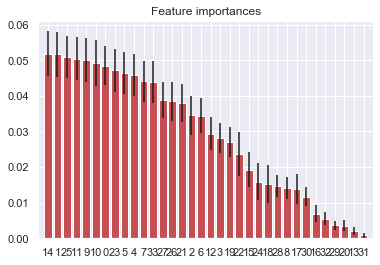

In [46]:
# Plot the feature importances of the forest
plt.figure();
plt.title("Feature importances");
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center");
plt.xticks(range(X.shape[1]), indices);
plt.xlim([-1, X.shape[1]]);

## Principal Component Analysis

**Principal Component Analysis**, or **PCA**, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. It transforms the original variables into a new set of variables such that they are orthogonal (and hence linearly independent) and then ranked according to the variance of data among them. These newly extracted variables are called Principal Components.

* Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset.
* The second principal component(uncorrelated to the first) tries to explain the remaining variance(not explained by the first).
* The third principal component explains the variance not explained by first and second and so on.



### STEPS INVOLVED IN PCA

* Standardize the data and compute the Covariance Matrix
* Compute the Eigenvectors and Eigenvalues of the Covariance Matrix 
* Sort the eigenvectors according to their eigenvalue (in decreasing order).
* Use Eigenvectors corresponding to the (k)largest eigenvalues to reconstruct a large fraction of variance of the original data.

## In class Activity

### About the Dataset

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter. 

-  Number of Instances: 4601 (1813 Spam = 39.4%)
-  Number of Attributes: 58 (57 continuous, 1 nominal class label)

 -  Attribute Information:

    -  The last column of 'spambase.data' denotes whether the e-mail was 
       considered spam (1) or not (0)
    
    - 48 attributes are continuous real [0,100] numbers of type `word freq WORD` i.e. percentage of words in the e-mail that         match WORD

    - 6 attributes are continuous real [0,100] numbers of type `char freq CHAR` i.e. percentage of characters in the e-mail           that match CHAR
    
    - 1 attribute is continuous real [1,...] numbers of type `capital run length average` i.e. average length of uninterrupted       sequences of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length longest` i.e. length of longest                   uninterrupted sequence of capital letters

    - 1 attribute is continuous integer [1,...] numbers of type `capital run length total` i.e. sum of length of uninterrupted       sequences of capital letters in the email

    - 1 attribute is nominal {0,1} class  of type spam i.e  denotes whether the e-mail was considered spam (1) or not (0),  

- Missing Attribute Values: None

- Class Distribution:
	Spam	  1813  (39.4%)
	Non-Spam  2788  (60.6%)



You can read more about dataset [here](https://archive.ics.uci.edu/ml/datasets/spambase)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [52]:
#Loading the Spam data for the mini challenge
#Target variable is the 57 column i.e spam, non-spam classes 
df = pd.read_csv('../data/spambase.data.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


### 1. Get an overview of your data by using info() and describe() functions of pandas.

In [53]:
# Overview of the data

# Code starts here

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3

### 2. Split the data into train and test set and fit the base logistic regression model on train set.

In [ ]:
#Dividing the dataset set in train and test set and apply base logistic model

# Code starts here

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)

### 3. Find out the accuracy , print out the Classification report and Confusion Matrix.

In [ ]:
# Calculate accuracy , print out the Classification report and Confusion Matrix.

# Code starts here

print("Accuracy on test data:", lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

### 4. Copy dataset df into df1 variable and apply correlation on df1

In [ ]:
# Copy df in new variable df1
df1 = df.copy()

### 5. As we have learned  one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity), So we have to find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied. 

In [ ]:
# Remove Correlated features above 0.75 and then apply logistic model

# Code starts here

corr_matrix = df1.drop(57,1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Columns to be dropped: ")
print(to_drop)
df1.drop(to_drop,axis=1,inplace=True)

### 6. Split the  new subset of the  data acquired by feature selection into train and test set and fit the logistic regression model on train set.

In [ ]:
# Split the new subset of data and fit the logistic model on training data

# Code starts here

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 0)
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)


### 7. Find out the accuracy , print out the Classification report and Confusion Matrix.

In [ ]:
# Calculate accuracy , print out the Classification report and Confusion Matrix for new data
print("Accuracy on test data:", lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred))

### 8. After keeping highly correlated features, there is not much change in the score. Lets apply another feature selection technique(Chi Squared test) to see whether we can increase our score. Find the optimum number of features using Chi Square and fit the logistic model on train data.

In [ ]:
# Apply Chi Square and fit the logistic model on train data use df dataset
nof_list=[20,25,30,35,40,50,55]
high_score=0
nof=0

# Code starts here

for n in nof_list:
    test = SelectKBest(score_func=chi2 , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = LogisticRegression(random_state=101)
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)


### 9. Find out the accuracy , print out the Confusion Matrix.

In [ ]:
# Calculate accuracy , print out the Confusion Matrix 
y_pred = model.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

### 10. Using chi squared test there is no change in the score and the optimum features that we got is 55. Now lets see if we can increase our score using another feature selection technique called Anova.Find the optimum number of features using Anova and fit the logistic model on train data.

In [ ]:
# Apply Anova and fit the logistic model on train data use df dataset
nof_list=[20,25,30,35,40,50,55]
high_score=0
nof=0

# Code starts here

for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= n )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    print("For no of features=",n,", score=", model.score(X_test,y_test))

    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        model_ = model
        nof=n 
print("High Score is:",high_score, "with features=",nof)

### 11. Find out the accuracy , print out the Confusion Matrix.

In [ ]:
# Calculate accuracy , print out the Confusion Matrix 


# Code starts here

y_pred = model.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

### 12. Unfortunately Anova also couldn't give us a better score . Let's finally attempt PCA on train data and find if it helps in  giving a better model by reducing the features.

In [ ]:
# Apply PCA and fit the logistic model on train data use df dataset
nof_list=[20,25,30,35,40,50,55]
high_score=0
nof=0

# Code starts here

for n in nof_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    logistic = LogisticRegression(solver = 'lbfgs')
    logistic.fit(X_train, y_train)
    print("For no of features=",n,", score=", logistic.score(X_test,y_test))
    
    if logistic.score(X_test,y_test)>high_score:
        high_score=logistic.score(X_test,y_test)
        logistic_ = logistic
        nof=n 
print("High Score is:",high_score, "with features=",nof)

### 13. Find out the accuracy , print out the Confusion Matrix. 

In [ ]:
# Calculate accuracy , print out the Confusion Matrix 

# Code starts here

y_pred = logistic.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

### 14. You can also compare your predicted values and observed values by printing out values of logistic.predict(X_test[]) and  y_test[].values

In [ ]:
# Compare observed value and Predicted value

# Code starts here

print("Prediction for 10 observation:    ",logistic.predict(X_test[0:10]))
print("Actual values for 10 observation: ",y_test[0:10].values)

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>

<br>

# In-session Recap Time
***
* Feature Selection
* Univariate Feature Selection
* Multivariate Feature Selection
* Filter Methods
* Wrapper Methods
* Embedded Methods

# Thank You
***
### Next Session: Decision Trees